In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

please, we can find the plots and numbers different from the report that because i ran the note again and sure it is random, (may be seeds() can be useful here)

In [2]:
# generate 10 observations dataset from binormal distribution
mean = np.array([0,0])
cov = np.array([[1.0,0.8],[0.8,1.0]]) # diagonal covariance, p=0.8 is correlation cofficent

X,y = np.random.multivariate_normal(mean,cov,10).T


In [3]:
# reshape before fitting the data
X=X.reshape(-1,1)
y=y.reshape(-1,1)


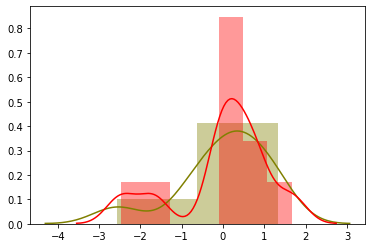

In [4]:
# let us look at the distribution for X and y
sns.distplot( X , color="olive")
sns.distplot(y , color="red")

In [5]:
# import the LR model
from sklearn.linear_model import LinearRegression

# create an instance
L = LinearRegression()

# fit the train data into the model
L.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# predict using RL model
x_test=X
predictions = L.predict(x_test)


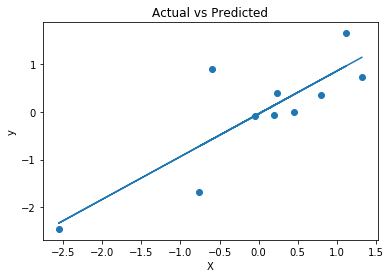

In [7]:
# Plot regression model and data
plt.figure()
plt.scatter(X, y)#  actual data
plt.plot(X, predictions) # regression model 
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [8]:
#calculate MSE
MSE = np.square(y-predictions).mean()
MSE

0.4081746980863571

### conditional expectation of a bivariate normal

In [9]:
# check the shape of the data (number of rows)
X.shape[0]

10

In [10]:
# this function calculate the covariance of X and y, 
# which needed to calclate the conditional expectation function
def covxy(X,y):
    x_mu=X-(np.mean(X))# difference between x and mean of x
    y_mu=y-(np.mean(y))# difference between y and mean of y
    xy_mu=np.dot(x_mu.T,y_mu)
    cov=xy_mu/(X.shape[0]-1)
    return cov

In [11]:
# conditional expectation function
def cef(X,y):
    xmu=np.mean(X)
    ymu=np.mean(y)
    varx=np.var(X)# the variance
    x_mu=X-(np.mean(X))
    cef=((covxy(X,y)/varx)*x_mu)+ymu
    return cef

In [12]:
# call the function to get the prediction using conditional expectation function
y_cef=cef(X,y)

In [13]:
# calculate the MSE of the best regression function
MSE = np.square(y-y_cef).mean()
MSE

0.41954615924951577

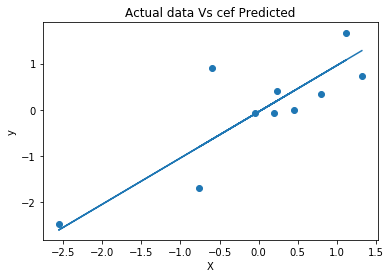

In [14]:
plt.figure()
plt.scatter(X, y)#  actual data
#plt.plot(X, predictions) # regression model using cef
plt.plot(X, y_cef) 
plt.title('Actual data Vs cef Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


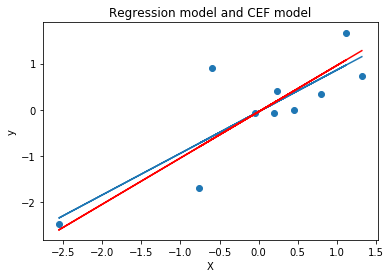

In [15]:
plt.figure()
plt.scatter(X, y)#  actual data
plt.plot(X, predictions) # regression model with sklearn
plt.plot(X, y_cef, 'r') #CEF model
plt.title('Regression model and CEF model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


### 1000 observations

#### Generate a large data set (1000 observations to represent the population) from the same distribution and calculate
#### the true error rate (the MSE or the risk) of your model on this data set; we denote this by err tr . This is the performance
#### conditional on the training set above. Obtain the performance of best regression function as well; denote it by err ∗

In [16]:
# generate 1000 observations dataset from binormal distribution
X1,y1 = np.random.multivariate_normal(mean,cov,1000).T

In [17]:
# reshape before fitting the data
X1=X1.reshape(-1,1)
y1=y1.reshape(-1,1)

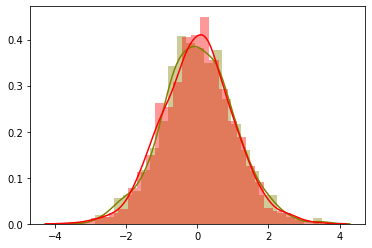

In [18]:
# let us look at the distribution of X1 and y1
sns.distplot(X1 , color="olive")
sns.distplot(y1 , color="red")

In [19]:
#fit the new data
L.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:

# predict y values
pred=L.predict(X1)
#pred

In [21]:
MSE = np.square(y1-pred).mean()# err_tr
MSE

0.3476879668746932

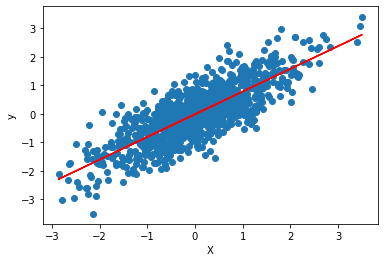

In [22]:
# Plot regression model and data
plt.figure()
plt.scatter(X1, y1)#  actual data
plt.plot(X1, pred, 'r') 
#plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


### useing conditional expectation function

In [23]:
# call the CEF function to fit predict 
y1_cef=cef(X1,y1)

In [24]:
MSE = np.square(y1-y1_cef).mean()# err*
MSE

0.3476886150540395

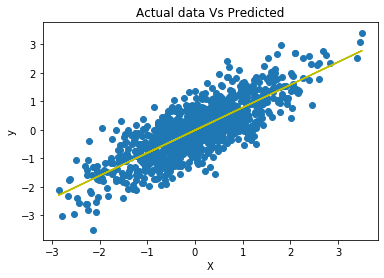

In [25]:
plt.figure()
plt.scatter(X1, y1)#  actual data
#plt.plot(X, predictions) # regression model
plt.plot(X1, y1_cef, 'y') # CEF model
plt.title('Actual data Vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


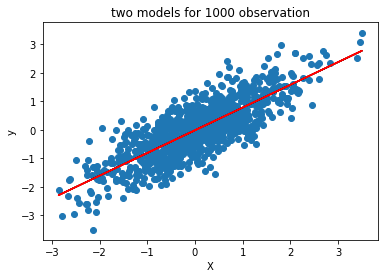

In [26]:
plt.figure()
plt.scatter(X1, y1)#  actual data
plt.plot(X1, pred,'black') # regression model
plt.plot(X1, y1_cef, 'r') # CEF model
plt.title('two models for 1000 observation')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# it is almost the same result

### Monti carlo :running many scenarios with different random inputs and summarizing the distribution of the results.

In [32]:
# monte- carlo simulation of 500 training set of size 10 observation.
from matplotlib import pyplot
def MC(itr,size):
    size = 10
    MSEs=[]
    diffs=[]
    m=itr # number of iterations
    for i in range(itr):# simulation of 500 sample of size 10
        X,y = np.random.multivariate_normal(mean,cov,10).T      
        X=X.reshape(-1,1)
        y=y.reshape(-1,1)
        L.fit(X, y) # fit data into linear regression model
        pred=L.predict(X1)
        MSE = np.square(y1-pred).mean()#calculate the MSE for each sample, err*        
        MSEs.append(MSE)     # save the MSEs in list
        # plot the models
        plt.plot(X1, pred, 'gray') 

        pyplot.title('Simulation of 500 train set for 10 observations')
        pyplot.xticks([])

    mse_avr=np.sum(MSEs)/m # calculate the expextation of the means
    print('the mean is ' ,mse_avr)
    # calculate the variance
    for i in MSEs:
        diff= (i-mse_avr)**2
        diffs.append(diff)
    var=np.sum(diffs)/(m-1)
    print('the variance is' ,var)
    # call the best regression function CEF
    y_cef=cef(X,y)
    # plot CEF
    pyplot.plot(X, y_cef, 'black')
    pyplot.show()

In [ ]:
#Note:  why we need the variance? to answer this question: How do I know that 500 samples is enough to get  good approximation 

the mean is  0.4354645185582127
the variance is 0.009659324676717578


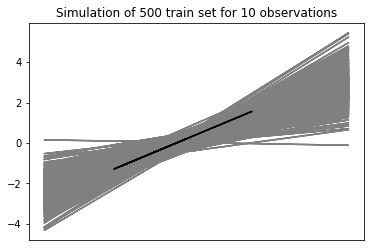

In [33]:

MC(500,10)

In [34]:


from numpy.random import normal
from matplotlib import pyplot
# define the distribution
def MC_multi_size(itr):
# generate monte carlo samples of differing size
    sizes = [20, 40, 80, 100, 200, 300, 400, 500, 700, 1000]
    MSEs=[]
    diffs=[]
    errors=[]
    m=itr
    stats={}
    for i in range(len(sizes)):# iterate on the different size of samples
        for iter_ in range(itr):
    # generate sample 500 times, with size[i]
            X,y = np.random.multivariate_normal(mean,cov,sizes[i]).T 
            X=X.reshape(-1,1)
            y=y.reshape(-1,1)
            L.fit(X, y)
            pred=L.predict(X1)
            MSE = np.square(y1-pred).mean()# err*        
            MSEs.append(MSE)
        # if we want to plot the samples with different size
            #pyplot.subplot(5, 2, i+1)

            #pyplot.plot(X1, pred, 'gray') 
            #pyplot.hist(errors, bins=20)

       # pyplot.title('%d samples' % sizes[i])#sizes[i]
       # pyplot.xticks([])

        mse_avr=np.sum(MSEs)/m
        #print(mse_avr)
        for mse in MSEs:
            diff= (mse-mse_avr)**2
            diffs.append(diff)
        var=np.sum(diffs)/(m-1)
#         print(mse_avr)
#         print(var)
        y_cef=cef(X1,y1)
        error_tr= np.square(y1-y_cef).mean()
        print(cef_MSE)
        #plt.plot(cef_MSE)
        stats[i]={'size':sizes[i],'MSE': mse_avr , 'VAR' :var, 'cef_MSE':error_tr } 
        # we convert it to dataframe to plot it easly
        statistics=pd.DataFrame(stats)
        statistics=statistics.T# to make the row columns and viseversa
        #now we plot the MSE, Variance and the best regression function MSE for the different sizes of training set 
    ax = plt.gca()
    statistics.plot(kind='line',x='size',y='cef_MSE',color='Black',ax=ax)
    statistics.plot(kind='line',x='size',y='MSE',color='yellow',ax=ax)
    statistics.plot(kind='line',x='size',y='VAR',xticks=[20,40,80,100,200,300,400,500,700,1000], color='red', ax=ax)

    plt.show()

    #print(statistics)

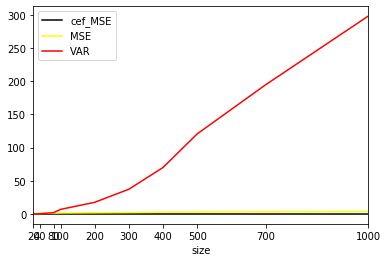

In [35]:
MC_multi_size(500)